# Fig. 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib
import xarray as xr 
import warnings
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from cartopy import feature as cfeature

import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# Configure plotting defaults
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 20})

# Suppress specific warnings
warnings.filterwarnings("ignore")


## Get Data

In [2]:
# Read in Gridfiles
path = "/work/bb1174/user/jason/grids/"
base = xr.open_mfdataset(path + "dom1_grids/external_parameter_icon_domain1_DOM01_tiles.nc", engine = 'netcdf4').squeeze()
dom2 = xr.open_mfdataset(path + "dom2_grids/domain2_DOM02.nc", engine = 'netcdf4').squeeze() 
dom3 = xr.open_mfdataset(path + "dom3_grids/domain3_DOM03.nc", engine = 'netcdf4').squeeze() 
dom4 = xr.open_mfdataset(path + "les_grids/les_DOM01.nc", engine = 'netcdf4').squeeze() 

## Prepare Plot

In [3]:
# Function to truncate colormap
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
        f'trunc({cmap.name},{minval:.2f},{maxval:.2f})',
        cmap(np.linspace(minval, maxval, n))
    )
    return new_cmap


In [4]:
# Function to draw a rectangle on a map
def draw_rectangle(ds, color):
    # Defining the corners of the rectangle
    lon_min, lon_max = np.rad2deg(ds.clon.min()), np.rad2deg(ds.clon.max())
    lat_min, lat_max = np.rad2deg(ds.clat.min()), np.rad2deg(ds.clat.max())

    # Creating a rectangle patch
    rect = patches.Rectangle(
        (lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
        linewidth=4, edgecolor=color, facecolor='none', transform=ccrs.PlateCarree()
    )
    return rect

In [5]:
# Add blue for the Ocean to the Colormap

old_cmap = truncate_colormap(cm.get_cmap('gist_earth', 256), 0.3, 1)
newcolors = old_cmap(np.linspace(0, 1, 256))
blue = np.array([100/256, 149/256, 237/256, 1])
newcolors[:4, :] = blue
newcmp = ListedColormap(newcolors)

## Plot Figure

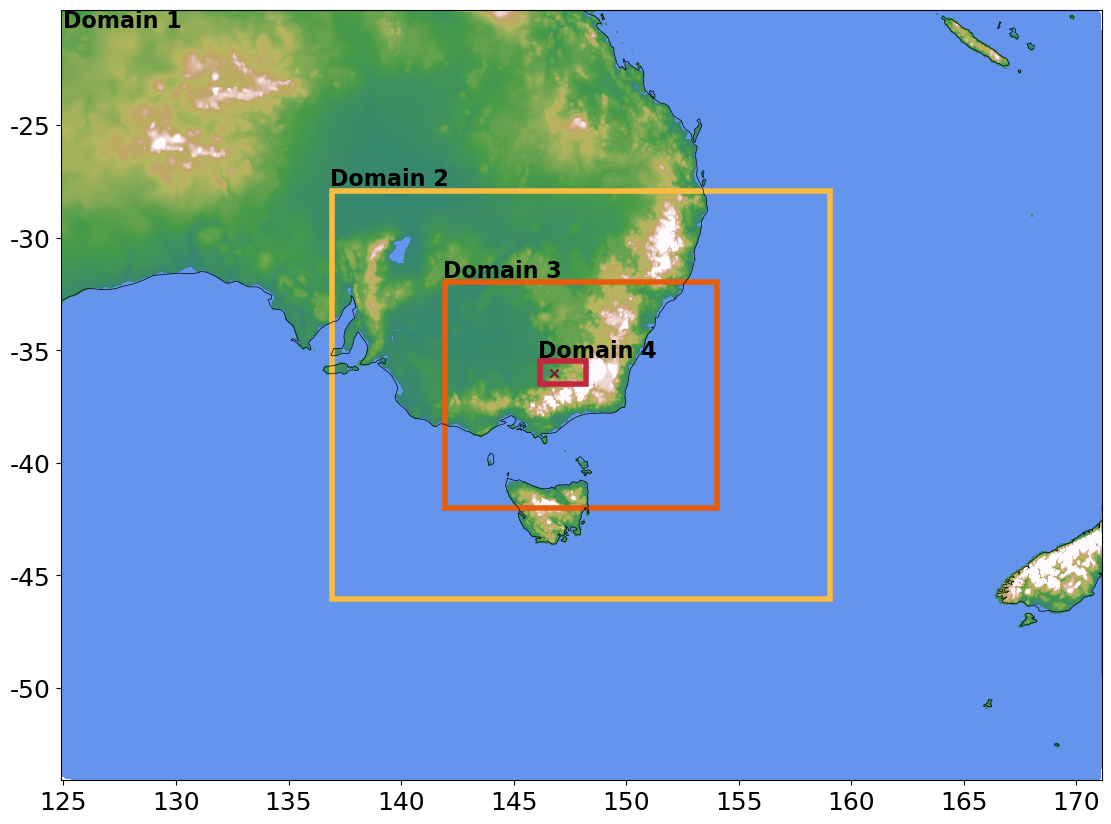

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize = (20,10))

# Contour plot
plt.tricontourf(np.rad2deg(base.clon), np.rad2deg(base.clat), base.topography_c, transform=ccrs.PlateCarree(), cmap = newcmp, levels = np.arange(0,1000,10), extend = "max")
plt.scatter(146.8,-36, color = '#821131', marker = "x")



rect2 = draw_rectangle(dom2, color = "#FABC3F")
rect3 = draw_rectangle(dom3, color = "#E85C0D")
rect4 = draw_rectangle(dom4, color = "#C7253E")

ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)


ax.set_xticks(np.arange(125,175,5))
ax.set_yticks(np.arange(-50,-20,5))
ax.set_xticklabels(np.arange(125,175,5), fontsize = 18)
ax.set_yticklabels(np.arange(-50,-20,5), fontsize = 18)


plt.text(124.97295382725387,-20.646793342521008, "Domain 1", weight='bold', fontsize = 16, color = "black")
plt.text(136.84288626937654,-27.6783777064233, "Domain 2", weight='bold', fontsize = 16, color = "black")
plt.text(141.87295399320225,-31.773744754166425, "Domain 3", weight='bold', fontsize = 16, color = "black")
plt.text(146.09356038297556,-35.29341631443479, "Domain 4", weight='bold', fontsize = 16, color = "black")



# Adding coastlines
ax.coastlines(linewidth=0.5, color = "black")


my_path = "./figs/"
fig.savefig(my_path + 'fig01.png', dpi=300, bbox_inches='tight')
fig.savefig(my_path + 'fig01_lq.png', dpi=50, bbox_inches='tight')

In [7]:
# Get edge lengths
print("Latitude range: " + str(np.rad2deg(dom4.clat.min().values) - np.rad2deg(dom4.clat.max().values)))
print("Longitude range: " + str(np.rad2deg(dom4.clon.min().values) - np.rad2deg(dom4.clon.max().values)))

Latitude range: -1.0132112247615979
Longitude range: -2.0128569486163315
